---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

---

## ▣ 데이터 소개
[기본 데이터]
* 학습데이터 : traindata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [과제1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요

import pandas as pd
import numpy as np
import scipy.stats as spst
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [3]:
#이번 프로젝트에서 분석할 데이터를 불러오세요

data = pd.read_csv('./traindata.csv', delimiter=',')

In [4]:
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [6]:
data.isna().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

In [7]:
# to datetime
data['date'] = pd.to_datetime(data['date'])

### [과제2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 변수를 포함하여, 최소 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1 : 1시간전 강우 여부와 따릉이간에는 연관성이 없다.

    
    ㅇ 대립가설 : 1시간전 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : 미세먼지 농도와 따릉이 대여량에는 연관성이 없다.

    
    ㅇ 대립가설 : 미세먼지 농도와 따릉이 대여량에는 연관성이 있다.


- 가설 3 : 주말 여부와 따릉이 대여량에는 연관성이 없다.

    
    ㅇ 대립가설 : 주말 여부와 따릉이 대여량에는 연관성이 있다.


- 가설 4 :  미세먼지 농도가 높을 때 강우 여부는 따릉이 대여량에는 연관성이 없다.

    
    ㅇ 대립가설 : 미세먼지 농도가 높을 때 강우 여부는 따릉이 대여량 간에는 연관성이 있다.


- 가설 5 :  계절(월)과 따릉이 대여량에는 연관성이 없다.

    
    ㅇ 대립가설 : 계절(월)과 따릉이 대여량 간에는 연관성이 있다.


- 가설 6 :  따릉이 대여량에는 없다.

    
    ㅇ 대립가설 : 대여량 간에는 연관성이 있다.



### [과제3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

In [212]:
var = 'hour'

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [213]:
#변수의 자료형을 확인해보세요.

print(data[var].dtypes)
print(data[var].min())
print(data[var].max())
print(data[var].nunique())

int64
0
23
24


dtype('int64'), 숫자형

3. 변수의 결측치 존재 여부 및 조치방안

In [10]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['hour'].isna().sum()

0

없음

4. 변수의 기초 통계량 확인

In [12]:
#변수의 기초 통계량을 확인해보세요
data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

count    5827.000000

mean       11.506607

std         6.921963

min         0.000000

25%         6.000000

50%        12.000000

75%        18.000000

max        23.000000

Name: hour, dtype: float64

5. 변수의 분포 확인

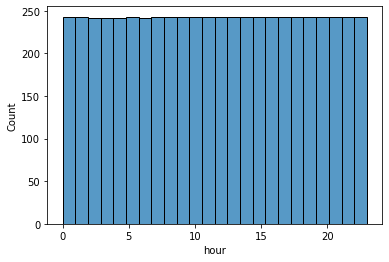

In [15]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
sns.histplot(x='hour', data=data, bins=24)
plt.show()

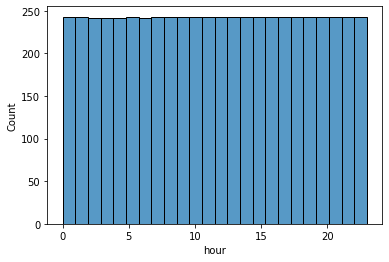

6. 위 정보로 부터 파악한 내용 정리

In [5]:
#위 정보로부터 파악하신 내용을 정리해보세요.

따릉이는 시간에 관계없이 대여된다.

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

In [24]:
var = 'temperature'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

온도가 매우 높으면 더워서 따릉이를 타기 힘들 것이고 너무 낮으면 추위 때문에 덜 타지 않을까?

2. 변수가 수치형인지 범주형인지


In [19]:
#변수의 자료형을 확인해보세요.
print(data.temperature.dtype)
print(data.temperature.min())
print(data.temperature.max())
print(data.temperature.nunique())

float64
-3.5
36.3
377


부동소수점 타입, -3.5도에서 36.3도 까지 온도 범위

3. 변수의 결측치 존재 여부 및 조치방안

In [22]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['temperature'].isna().sum()

0

없다. 만약 결측치가 존재한다면 계절간의 온도는 천천히 내려갔다 올라가는걸 생각해서 interpolate를 사용하여 앞뒤 날짜간 균일하게 채워준다.

4. 변수의 기초 통계량 확인

In [23]:
#변수의 기초 통계량을 확인해보세요
data.temperature.describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

count    5827.000000

mean       19.376798

std         7.501572

min        -3.500000

25%        14.100000

50%        20.400000

75%        24.900000

max        36.300000

Name: temperature, dtype: float64

5. 변수의 분포 확인

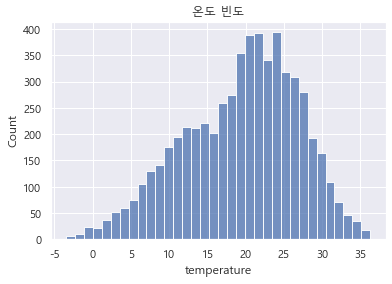

In [30]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
plt.title('온도 빈도')
sns.histplot(x='temperature', data=data)
plt.show()

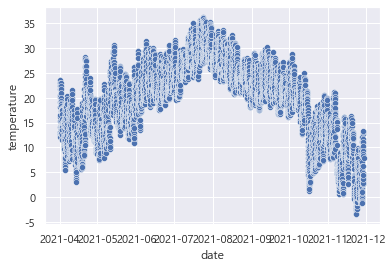

In [34]:
sns.scatterplot(x='date', y='temperature', data=data)
plt.show()

In [31]:
temp = data.copy()
temp['Month'] = temp['date'].dt.month

temp = temp.groupby(by='Month', as_index=False).mean()
temp

,Month,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,4,11.539749,39.022504,17.956399,0.033337,14.176709,0.058577,2.638215,54.202232,1818.666667,229.338912
1,5,11.510094,56.505435,17.717185,0.032134,17.040915,0.141319,2.398385,68.149394,1622.261104,192.686406
2,6,11.500000,31.116901,18.992948,0.038571,22.781111,0.076389,2.188194,72.651389,1655.452778,223.576389
3,7,11.500000,24.228142,14.224658,0.039207,28.079973,0.052419,2.024731,70.983871,1816.673387,196.456989
4,8,11.500000,21.160109,11.895664,0.034077,25.850538,0.102151,2.116398,74.416667,1825.365591,200.711022
5,9,11.519499,14.985816,6.759887,0.033705,22.566992,0.082173,2.360585,70.888579,1864.412256,264.309192
6,10,11.500000,26.853693,12.610719,0.024120,15.579301,0.067204,2.100000,69.735215,1845.000000,228.341398
7,11,11.483501,41.747826,25.559593,0.017561,8.266428,0.020086,2.081923,67.456241,1612.865136,186.172166


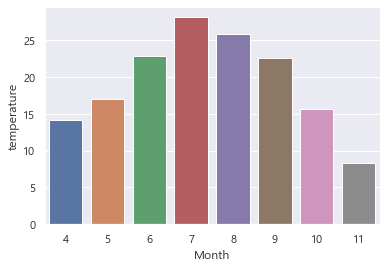

In [33]:
sns.barplot(x='Month', y='temperature', data=temp)
plt.show()

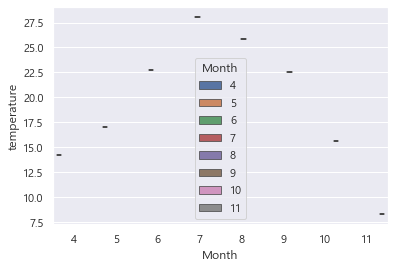

In [39]:
sns.boxplot(x='Month', y=var, data=temp, hue='Month')
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

In [42]:
var = 'precipitation'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

비가 오면 우산을 써야 하기 때문에 따릉이를 타지 않을 것이다.

2. 변수가 수치형인지 범주형인지


In [43]:
#변수의 자료형을 확인해보세요.

print(data[var].dtypes)
print(data[var].nunique())

int64
2


범주형. 비가 온다(1) or 안온다(2)

3. 변수의 결측치 존재 여부 및 조치방안

In [44]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

0

없다. 만약 있다면 전날 혹은 다음날 데이터를 사용하는 것이 좋을 것 같다.

4. 변수의 기초 통계량 확인

In [46]:
#변수의 기초 통계량을 확인해보세요
data[var].mode()

0    0
Name: precipitation, dtype: int64

비가 안온 날이 제일 많았다.

5. 변수의 분포 확인

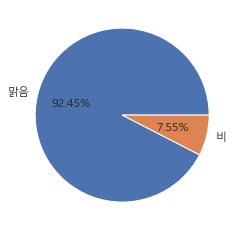

In [65]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.
temp = data[var].value_counts()
plt.pie(data[var].value_counts(), labels=['맑음', '비'], autopct='%.2f%%')
plt.show()

대부분의 시간은 맑았다.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

In [71]:
var = 'windspeed'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [72]:
#변수의 자료형을 확인해보세요.
print(data[var].dtypes)
print(data[var].min())
print(data[var].max())
print(data[var].nunique())

float64
0.0
8.3
72


수치형, 부동소수점, 0 m/s 에서 8.3 m/s

3. 변수의 결측치 존재 여부 및 조치방안

In [73]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data[var].isna().sum()

0

결측치 없음. 그 전 시간대의 풍속이나 강우 여부 혹은 시계의 악화 상태에 따라 결측치를 보충해야 할 것 같다.

4. 변수의 기초 통계량 확인

In [74]:
#변수의 기초 통계량을 확인해보세요
data[var].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

C:\Users\allsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


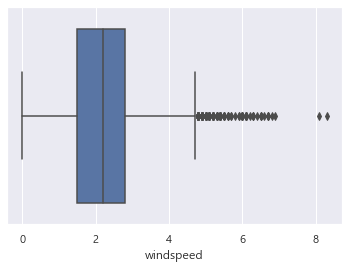

In [76]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

sns.boxplot(data[var])
plt.show()

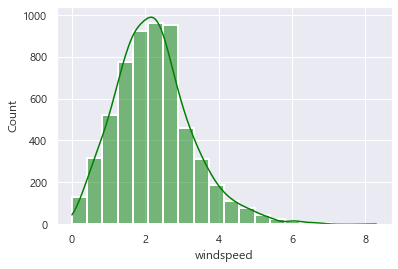

In [97]:
sns.histplot(data[var], bins=20, kde=True, linewidth=2, color='green')
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

In [98]:
var = 'humidity'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

습도, 굽굽한 날씨의 정도

2. 변수가 수치형인지 범주형인지


In [99]:
#변수의 자료형을 확인해보세요.

print(data[var].dtypes)
print(data[var].min())
print(data[var].max())
print(data[var].nunique())

int64
19
100
82


3. 변수의 결측치 존재 여부 및 조치방안

In [100]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

data[var].isna().sum()

0

interpolate를 통해 보간처리 할 것이다. 온도와 마찬가지로 시간에 따라 천천히 변할 것이라 추측한다.

4. 변수의 기초 통계량 확인

In [101]:
#변수의 기초 통계량을 확인해보세요

data[var].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

data[var

5. 변수의 분포 확인

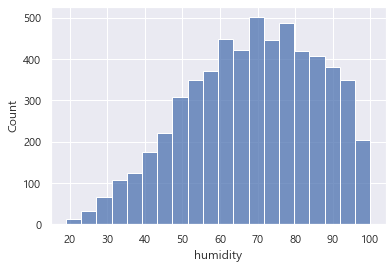

In [106]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

sns.histplot(data[var], bins = 20)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

In [107]:
var = 'visibility'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

시계, 시야, 안개나 미세먼지에 따라 얼마나 잘 보이는지의 척도?

2. 변수가 수치형인지 범주형인지


In [115]:
#변수의 자료형을 확인해보세요.

print(data[var].dtype)
print(data[var].max())
print(data[var].min())
print(data[var].nunique())

int64
2000
60
1032


3. 변수의 결측치 존재 여부 및 조치방안

In [116]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

data[var].isna().sum()

0

미세먼지 수치와 바람과의 연관 관계를 확인 해보고 interpolate를 할 지 평균치를 정할지 결정할 것 같다.

4. 변수의 기초 통계량 확인

In [124]:
#변수의 기초 통계량을 확인해보세요

data[var].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

In [128]:
data[var].value_counts()

2000    4218
1996       8
1984       7
1992       7
1997       6
        ... 
1756       1
313        1
848        1
1406       1
1250       1
Name: visibility, Length: 1032, dtype: int64

5. 변수의 분포 확인

C:\Users\allsa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


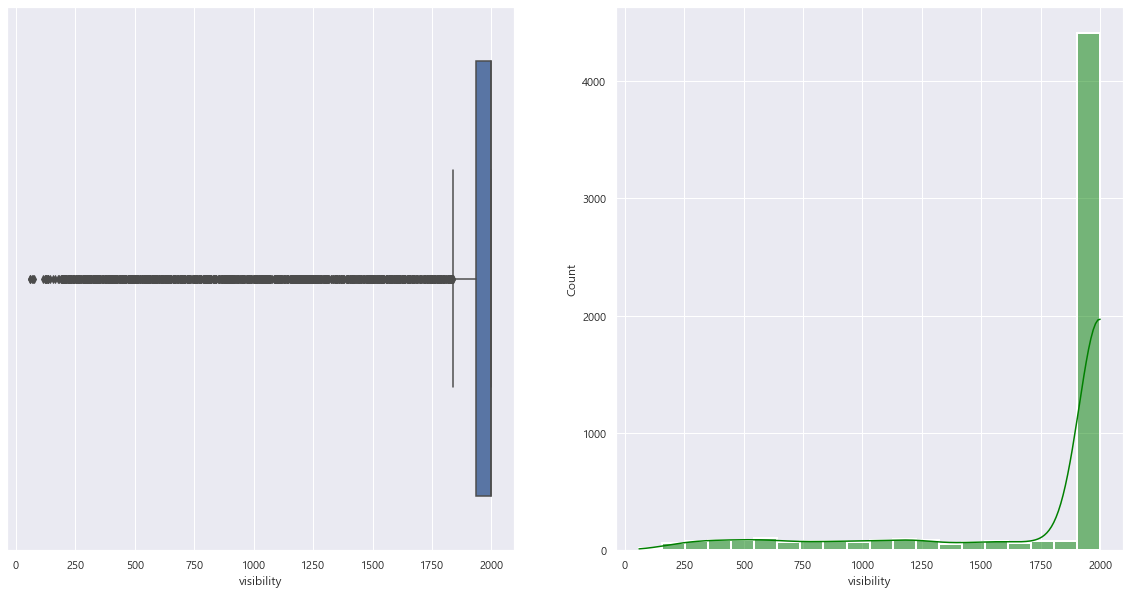

In [122]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data[var])

plt.subplot(1, 2, 2)
sns.histplot(data[var], bins=20, kde=True, linewidth=2, color='green')
plt.show()


대부분은 2천미터의 시야를 확보하고 있다.
비가  내리거나 미세먼지가 심한 날과의 이변량 분석을 해 볼 필요가 있을 것

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

In [129]:
var = 'ozone'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [130]:
#변수의 자료형을 확인해보세요.

print(data[var].dtype)
print(data[var].max())
print(data[var].min())
print(data[var].nunique())

float64
0.137
0.001
109


3. 변수의 결측치 존재 여부 및 조치방안

In [131]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

data[var].isna().sum()

128

오존량의 경우 온도의 영향을 많이 받는 것으로 알고 있다. 분석했을 때 강한 상관계수를 가진다면 온도를 기준으로 소팅한 후 interpolate한 값을 집어 넣는다.

4. 변수의 기초 통계량 확인

In [132]:
#변수의 기초 통계량을 확인해보세요

data[var].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

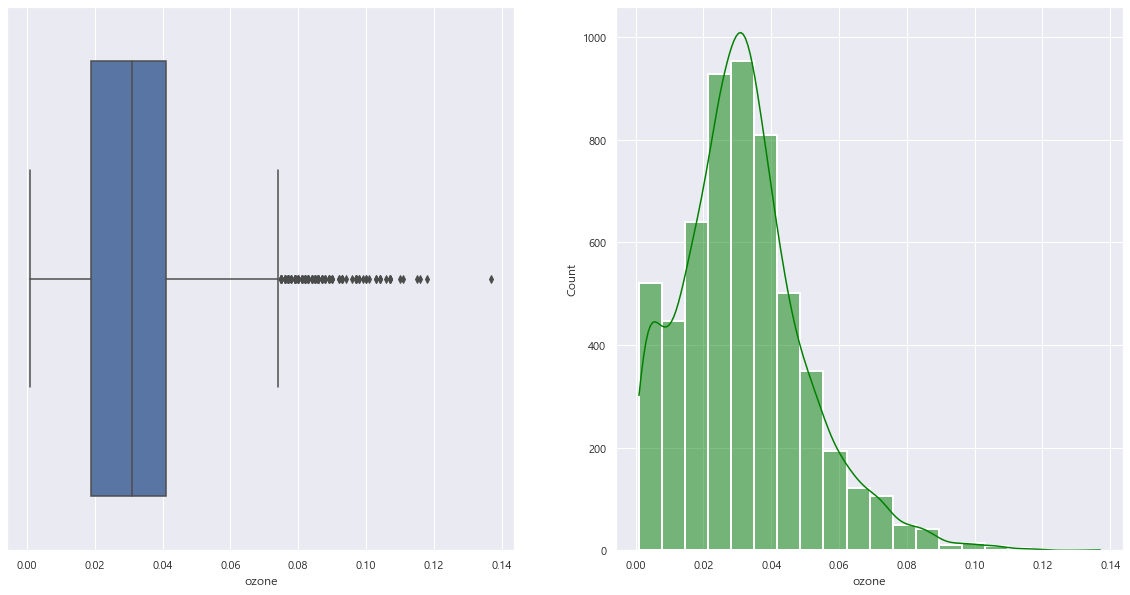

In [134]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x=data[var])

plt.subplot(1, 2, 2)
sns.histplot(data[var], bins=20, kde=True, linewidth=2, color='green')
plt.show()


6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

d

### Feature8 : PM10

In [135]:
var = 'PM10'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

미세먼지 수치

2. 변수가 수치형인지 범주형인지


In [138]:
#변수의 자료형을 확인해보세요.

print(data[var].dtype)
print(data[var].max())
print(data[var].min())
print(data[var].nunique())

float64
827.0
3.0
189


3. 변수의 결측치 존재 여부 및 조치방안

In [139]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

data[var].isna().sum()

102

계절과 강수량의 상관계수에 따라 정리 후 interpolate 한다.

4. 변수의 기초 통계량 확인

In [140]:
#변수의 기초 통계량을 확인해보세요

print(data[var].describe())
print('-' * 100)
print(data[var].value_counts())

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64
----------------------------------------------------------------------------------------------------
18.0     181
22.0     179
20.0     177
16.0     174
23.0     173
        ... 
296.0      1
373.0      1
433.0      1
479.0      1
332.0      1
Name: PM10, Length: 189, dtype: int64


5. 변수의 분포 확인

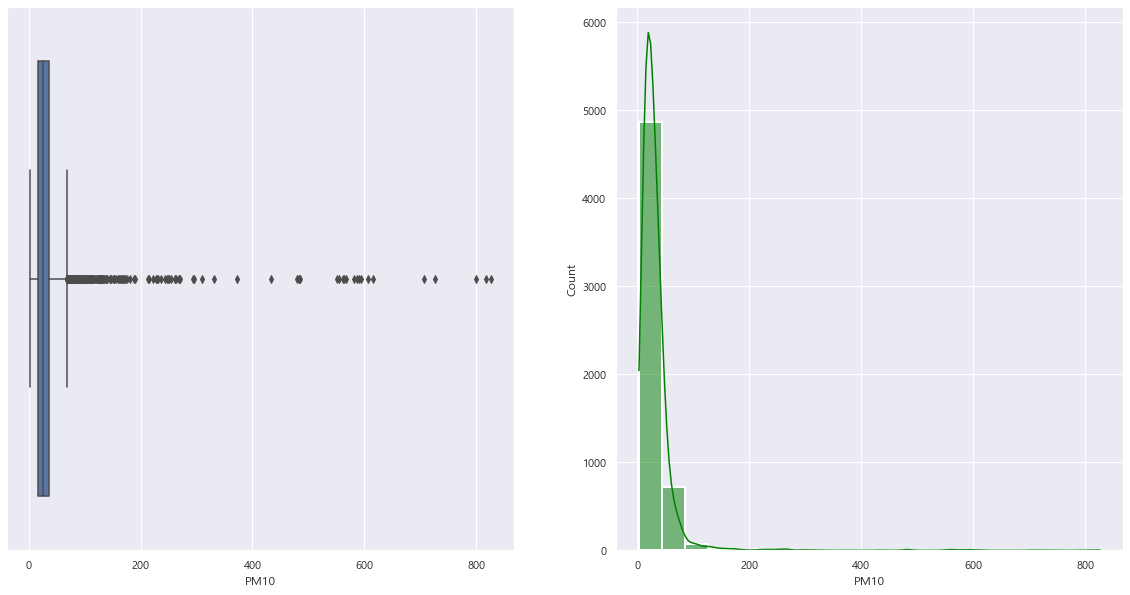

In [137]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x=data[var])

plt.subplot(1, 2, 2)
sns.histplot(data[var], bins=20, kde=True, linewidth=2, color='green')
plt.show()


6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

In [142]:
var = 'PM2.5'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

초미세먼지

2. 변수가 수치형인지 범주형인지


In [143]:
#변수의 자료형을 확인해보세요.

print(data[var].dtype)
print(data[var].max())
print(data[var].min())
print(data[var].nunique())

float64
125.0
1.0
110


3. 변수의 결측치 존재 여부 및 조치방안

In [144]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

data[var].isna().sum()

95

4. 변수의 기초 통계량 확인

In [145]:
#변수의 기초 통계량을 확인해보세요

print(data[var].describe())
print('-' * 100)
print(data[var].value_counts())

count    5732.000000
mean       15.666609
std        13.850990
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64
----------------------------------------------------------------------------------------------------
5.0      265
7.0      262
11.0     259
12.0     256
13.0     255
        ... 
115.0      1
117.0      1
106.0      1
86.0       1
82.0       1
Name: PM2.5, Length: 110, dtype: int64


5. 변수의 분포 확인

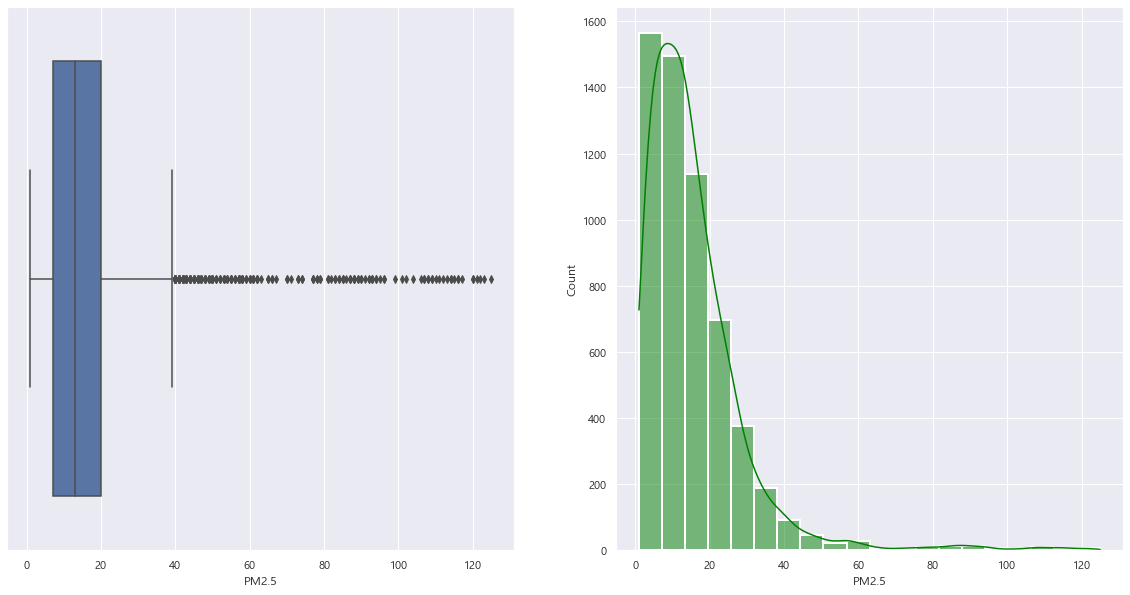

In [146]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x=data[var])

plt.subplot(1, 2, 2)
sns.histplot(data[var], bins=20, kde=True, linewidth=2, color='green')
plt.show()


6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

In [149]:
var = 'count'

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [151]:
#변수의 자료형을 확인해보세요.

print(data[var].dtype)
print(data[var].max())
print(data[var].min())
print(data[var].nunique())

int64
1746
1
757


3. 변수의 결측치 존재 여부 및 조치방안

In [152]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

data[var].isna().sum()

0

Target 이니 dropna()를 한다. 양이 많다면 분석이 힘들 것

4. 변수의 기초 통계량 확인

In [153]:
#변수의 기초 통계량을 확인해보세요

print(data[var].describe())
print('-' * 100)
print(data[var].value_counts())

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64
----------------------------------------------------------------------------------------------------
20     45
16     45
24     44
21     44
25     44
       ..
553     1
789     1
803     1
794     1
519     1
Name: count, Length: 757, dtype: int64


5. 변수의 분포 확인

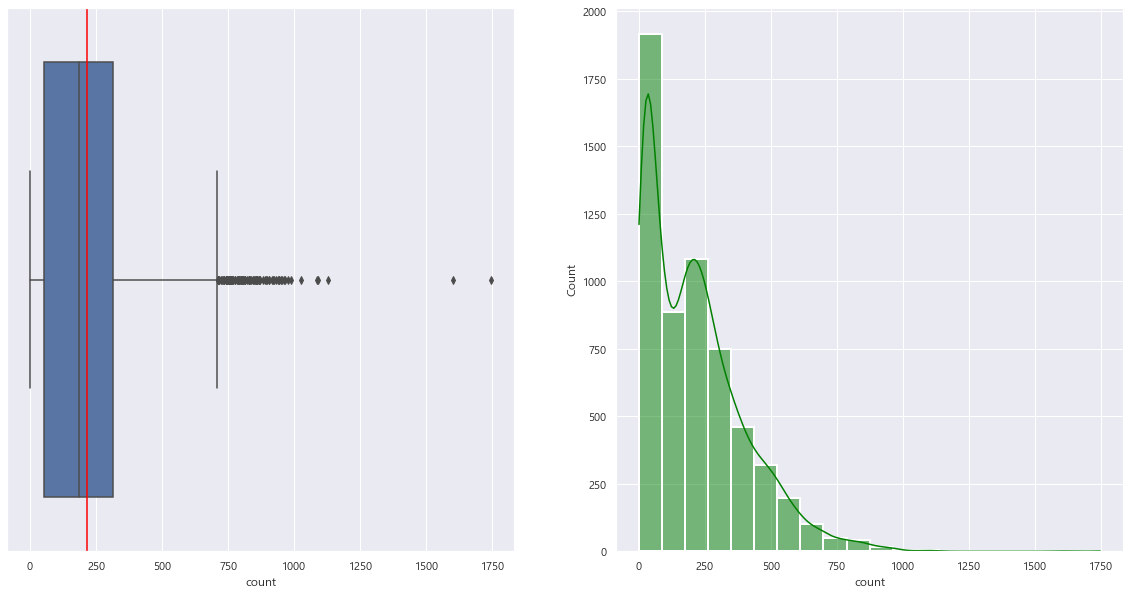

In [163]:
#변수의 분포를 시각화 라이브러리를 활용해 확인해보세요.

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.axvline(data[var].mean(), color='red')
sns.boxplot(x=data[var])

plt.subplot(1, 2, 2)
sns.histplot(data[var], bins=20, kde=True, linewidth=2, color='green')
plt.show()


6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### 4.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

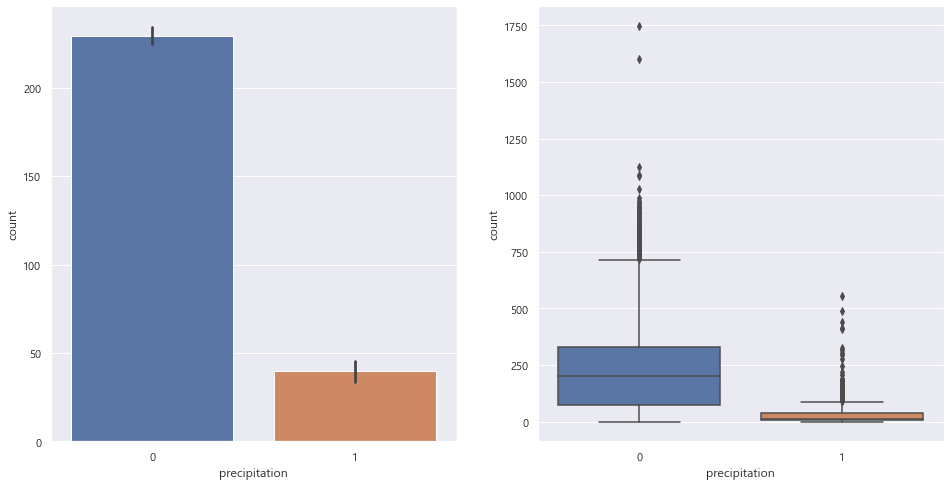

In [206]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'precipitation'

temp = data.groupby(by = 'precipitation', as_index=False)['count'].sum()

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.xticks([0,1])
sns.barplot(x=var, y='count', data=data)

plt.subplot(1, 2, 2)
sns.boxplot(x=var, y='count', data=data)

plt.show()



In [208]:
spst.ttest_ind(data.loc[data[var] == 1, 'count'], ~data.loc[data[var] == 1, 'count'])

Ttest_indResult(statistic=17.318815131448034, pvalue=4.971429001015234e-58)

Ttest_indResult(statistic=17.318815131448034, pvalue=4.971429001015234e-58)

강우량과 따릉이 대여량은 연관성이 있다.

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [209]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'hour'

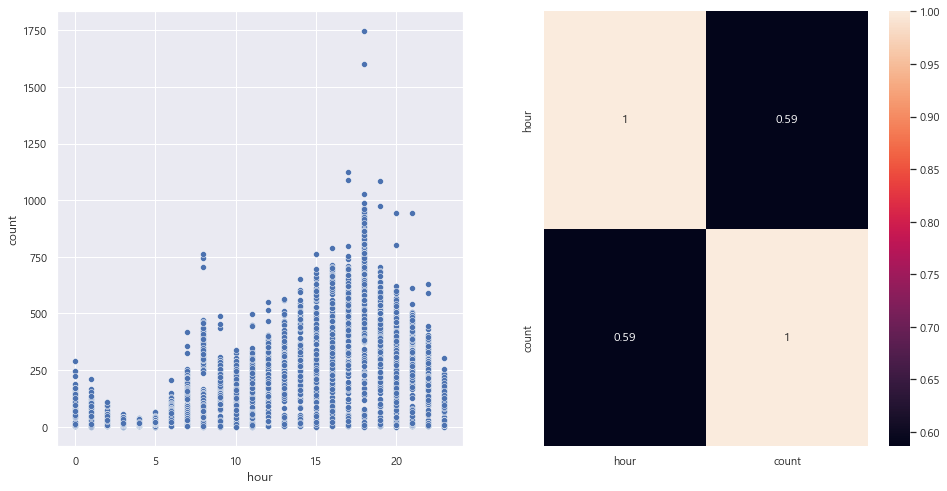

In [215]:
temp = data.loc[:, [var, 'count']]

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=var, y='count', data=data)

plt.subplot(1, 2, 2)
sns.heatmap(temp.corr(), annot = True)

plt.show()

In [223]:
spst.pearsonr(data[var], data['count'])

(0.5864350283919393, 0.0)

3. 온도 데이터와 따릉이 대여량간 분석

In [224]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'temperature'

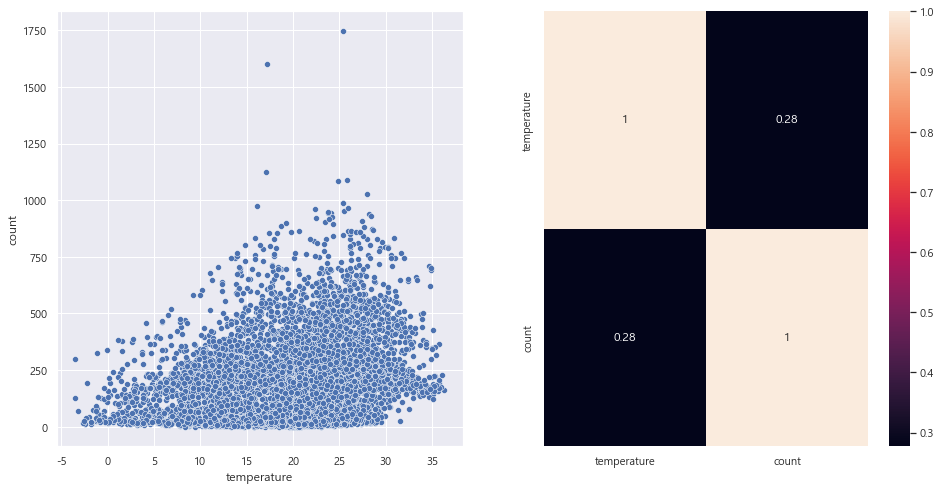

In [225]:
temp = data.loc[:, [var, 'count']]

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=var, y='count', data=data)

plt.subplot(1, 2, 2)
sns.heatmap(temp.corr(), annot = True)

plt.show()

In [226]:
spst.pearsonr(data[var], data['count'])

(0.2771692363089791, 2.9405165551619465e-103)

4. 풍속 데이터와 따릉이 대여량간 분석

In [227]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'windspeed'

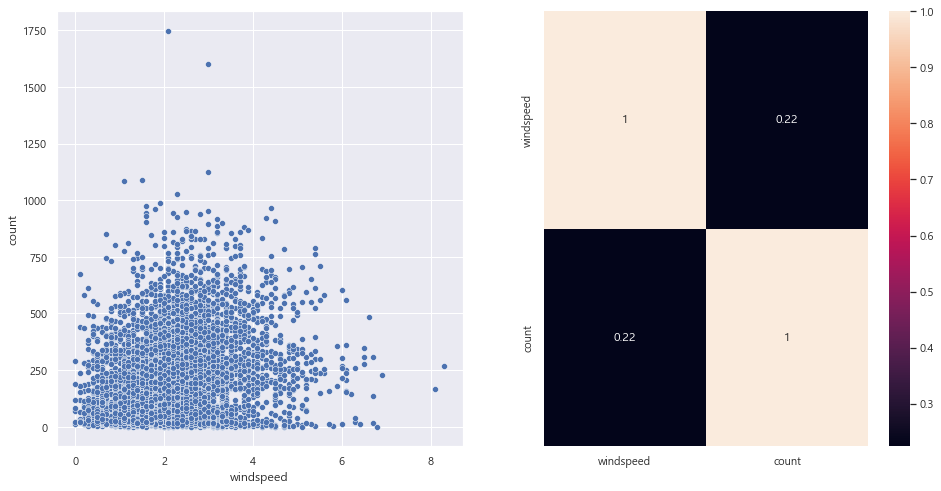

In [228]:
temp = data.loc[:, [var, 'count']]

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=var, y='count', data=data)

plt.subplot(1, 2, 2)
sns.heatmap(temp.corr(), annot = True)

plt.show()

In [229]:
spst.pearsonr(data[var], data['count'])

(0.22372189900674888, 5.2433176782994606e-67)

5. 습도 데이터와 따릉이 대여량간 분석

In [230]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'humidity'

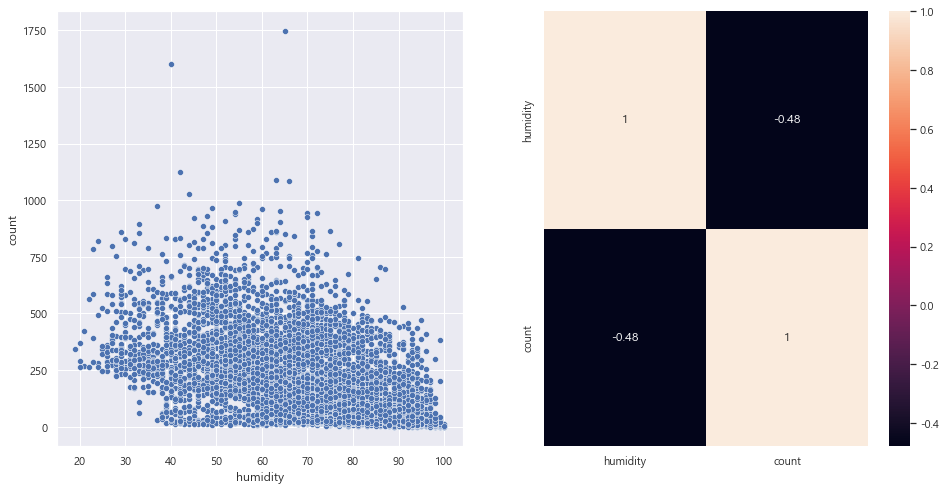

In [231]:
temp = data.loc[:, [var, 'count']]

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=var, y='count', data=data)

plt.subplot(1, 2, 2)
sns.heatmap(temp.corr(), annot = True)

plt.show()

In [232]:
spst.pearsonr(data[var], data['count'])

(-0.4789554265904137, 0.0)

6. 시정 데이터와 따릉이 대여량간 분석

In [233]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'visibility'

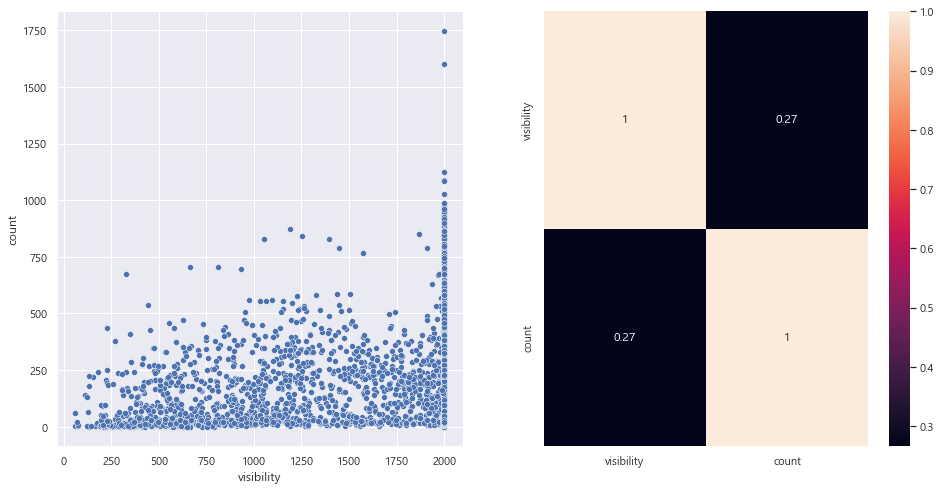

In [234]:
temp = data.loc[:, [var, 'count']]

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=var, y='count', data=data)

plt.subplot(1, 2, 2)
sns.heatmap(temp.corr(), annot = True)

plt.show()

In [235]:
spst.pearsonr(data[var], data['count'])

(0.26582778327488765, 7.876003852900128e-95)

7. 오존 데이터와 따릉이 대여량간 분석

In [236]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'ozone'

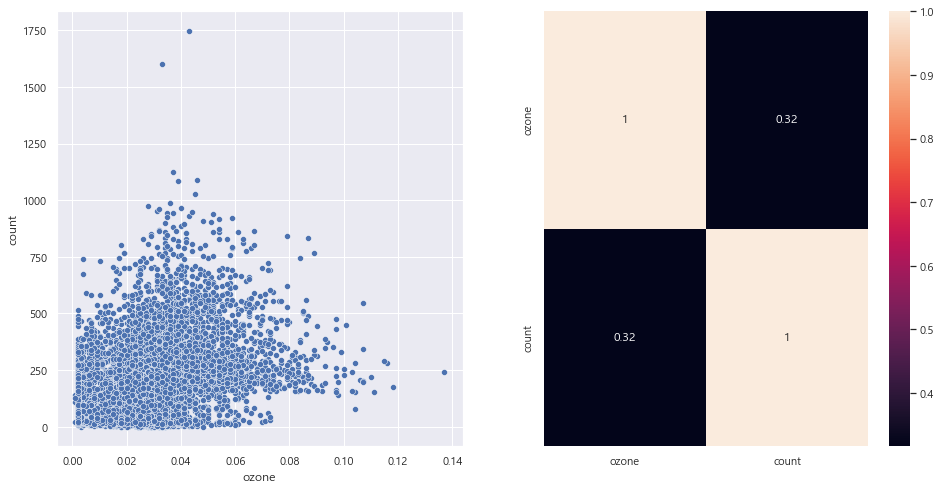

In [237]:
temp = data.loc[:, [var, 'count']]

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=var, y='count', data=data)

plt.subplot(1, 2, 2)
sns.heatmap(temp.corr(), annot = True)

plt.show()

In [249]:
temp = temp.loc[temp[var].notnull(), : ]
spst.pearsonr(temp[var], temp['count'])

(0.0529237283818275, 6.690256718116022e-05)

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [239]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'PM10'

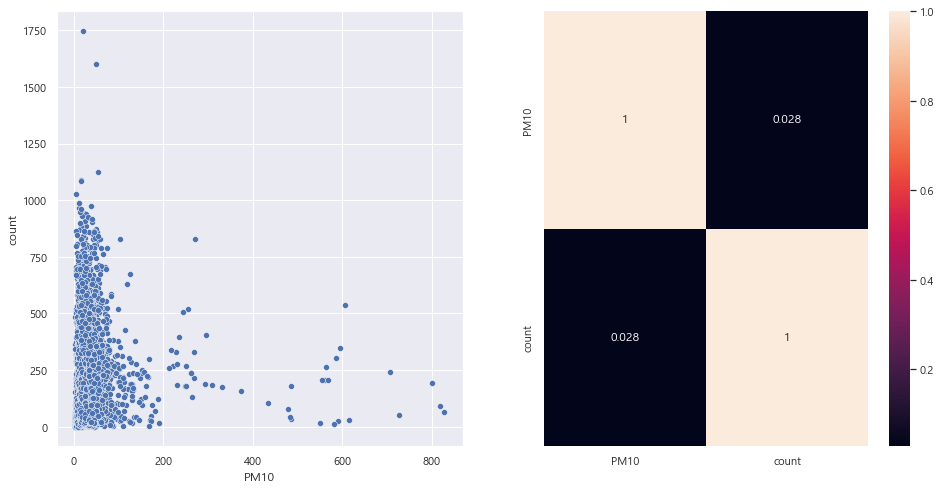

In [240]:
temp = data.loc[:, [var, 'count']]

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=var, y='count', data=data)

plt.subplot(1, 2, 2)
sns.heatmap(temp.corr(), annot = True)

plt.show()

In [250]:
temp = temp.loc[temp[var].notnull(), : ]
spst.pearsonr(temp[var], temp['count'])

(0.0529237283818275, 6.690256718116022e-05)

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [251]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

var = 'PM2.5'

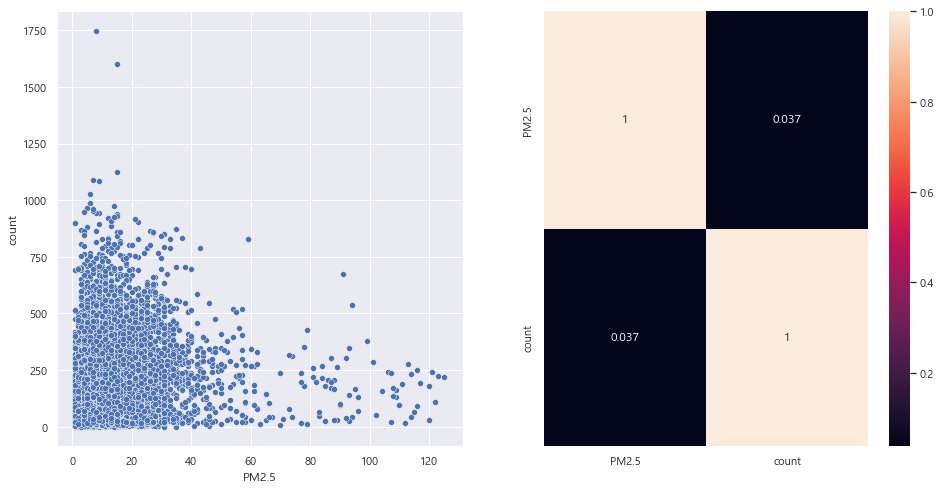

In [252]:
temp = data.loc[:, [var, 'count']]

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=var, y='count', data=data)

plt.subplot(1, 2, 2)
sns.heatmap(temp.corr(), annot = True)

plt.show()

In [253]:
temp = temp.loc[temp[var].notnull(), : ]
spst.pearsonr(temp[var], temp['count'])

(0.03712975748890091, 0.00493188735040528)

### 5. 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### 6. Insight 도출